In [ ]:
from autogluon.tabular import TabularPredictor

from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, f1_score, \
    precision_score, recall_score, top_k_accuracy_score, \
    confusion_matrix, classification_report

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")
sns.set_context("paper", font_scale=1.5)
plt.rcParams['font.family'] = 'Arial'

## 1. Evaluate on test data for 5 class
- `sp_mode`: `s` (only use substrate concentration)
- `feat`: `tsfresh_raw` (use both tsfresh features and raw data)
- `ag_train_quality`: `best_quality` (use `best_quality` present in Autogluon training)
- `hours`: `3` (train for 3 hours)

In [2]:
class_list = [
    'zero',
    'mm_1',
    # 'mm_1_out',
    'first',
    'mm_2',
    'second',
]
class_num = len(class_list)

ag_model_root = './AutogluonModels/'
sp_mode = 's'
feat = 'tsfresh_raw'
ag_train_quality = 'best_quality'
hours = 3
label_col = 'class'
random_seed = 29

# load test data
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
if sp_mode == 's':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)
elif sp_mode == 'p':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('s')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('s')], inplace=True)
if feat == 'tsfresh':
    test_merge_data = test_tsfresh_data
elif feat == 'raw':
    test_merge_data = test_raw_data
elif feat == 'tsfresh_raw':
    test_raw_data.drop(columns=['class'], inplace=True)
    test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test = test_merge_data[label_col]
test_merge_data_nolabel = test_merge_data.drop(columns=[label_col])  # delete label column

In [3]:
# load model
model_root = os.path.join(ag_model_root, f'{str(class_num)}_class', f'{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h')
predictor = TabularPredictor.load(model_root)
predictor.leaderboard()

model  score_val eval_metric  pred_time_val  \
0           WeightedEnsemble_L3   0.788778    accuracy      83.246156   
1             LightGBMXT_BAG_L2   0.788467    accuracy      76.079173   
2               LightGBM_BAG_L2   0.788133    accuracy      76.004107   
3          LightGBMLarge_BAG_L2   0.787511    accuracy      76.377855   
4          LightGBM_r131_BAG_L2   0.787489    accuracy      76.044030   
5                XGBoost_BAG_L2   0.787467    accuracy      76.504684   
6            XGBoost_r33_BAG_L2   0.786133    accuracy      76.667705   
7            CatBoost_r9_BAG_L2   0.786022    accuracy      75.797027   
8         ExtraTreesEntr_BAG_L2   0.785956    accuracy      80.530410   
9           LightGBM_r96_BAG_L2   0.785622    accuracy      76.243452   
10      RandomForestEntr_BAG_L2   0.785533    accuracy      80.298996   
11      RandomForestGini_BAG_L2   0.785089    accuracy      80.395761   
12        ExtraTreesGini_BAG_L2   0.785089    accuracy      80.479186   
13          WeightedEnsemble_L2   0.785044    accuracy      20.096224   
14              CatBoost_BAG_L2   0.783889    accuracy      75.751168   
15       NeuralNetFastAI_BAG_L2   0.783733    accuracy      76.116129   
16  NeuralNetFastAI_r191_BAG_L2   0.783667    accuracy      76.401003   
17         CatBoost_r177_BAG_L2   0.783400    accuracy      75.754836   
18        NeuralNetTorch_BAG_L2   0.782044    accuracy      77.564497   
19    NeuralNetTorch_r79_BAG_L2   0.781756    accuracy      77.585476   
20         LightGBMLarge_BAG_L1   0.781622    accuracy       3.613058   
21    NeuralNetTorch_r22_BAG_L2   0.780933    accuracy      77.628596   
22        ExtraTrees_r42_BAG_L2   0.780733    accuracy      77.139729   
23         CatBoost_r137_BAG_L2   0.779400    accuracy      75.743116   
24         LightGBM_r131_BAG_L1   0.779289    accuracy       7.133780   
25          LightGBM_r96_BAG_L1   0.779111    accuracy      21.388524   
26            LightGBMXT_BAG_L1   0.778133    accuracy       3.298458   
27               XGBoost_BAG_L1   0.777711    accuracy       1.210293   
28              LightGBM_BAG_L1   0.777511    accuracy       1.814051   
29      RandomForestEntr_BAG_L1   0.775489    accuracy       3.986238   
30      RandomForestGini_BAG_L1   0.774578    accuracy       4.046390   
31           CatBoost_r9_BAG_L1   0.772578    accuracy       0.175199   
32         CatBoost_r177_BAG_L1   0.771356    accuracy       0.146464   
33              CatBoost_BAG_L1   0.771111    accuracy       0.140519   
34        ExtraTreesGini_BAG_L1   0.770089    accuracy       4.096087   
35        ExtraTreesEntr_BAG_L1   0.768867    accuracy       4.098379   
36        NeuralNetTorch_BAG_L1   0.766467    accuracy       1.259388   
37    NeuralNetTorch_r22_BAG_L1   0.764933    accuracy       1.298126   
38           XGBoost_r33_BAG_L1   0.762044    accuracy       0.694321   
39    NeuralNetTorch_r79_BAG_L1   0.761089    accuracy       1.276760   
40       NeuralNetFastAI_BAG_L1   0.755156    accuracy       0.457642   
41  NeuralNetFastAI_r191_BAG_L1   0.753111    accuracy       0.687204   
42        KNeighborsDist_BAG_L1   0.609244    accuracy       7.355232   
43        KNeighborsUnif_BAG_L1   0.607089    accuracy       7.443603   

       fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0   5903.853377                0.002692           1.711158            3   
1   5380.136173                0.459459          62.157198            2   
2   5403.556016                0.384393          85.577041            2   
3   5601.761229                0.758141         283.782254            2   
4   5421.044511                0.424316         103.065536            2   
5   5425.219345                0.884969         107.240371            2   
6   5497.354778                1.047991         179.375804            2   
7   5869.501696                0.177313         551.522721            2   
8   5322.035858                4.910695           4.056883       

In [4]:
# predict on test data
y_pred = predictor.predict(test_merge_data_nolabel)
y_proba = predictor.predict_proba(test_merge_data_nolabel)

In [5]:
# show performance
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_proba, multi_class="ovr"):.4f}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred):.4f}')
print(f'F1: {f1_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Top-2 accuracy: {top_k_accuracy_score(y_test, y_proba, k=2):.4f}')
print(f'Top-3 accuracy: {top_k_accuracy_score(y_test, y_proba, k=3):.4f}')
print('================================')
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.7872
ROC_AUC: 0.9643
MCC: 0.7347
F1: 0.7851
Precision: 0.7860
Recall: 0.7872
Top-2 accuracy: 0.9594
Top-3 accuracy: 0.9968
Classification report:
              precision    recall  f1-score   support

       first       0.77      0.80      0.78      1000
        mm_1       0.84      0.74      0.79      1000
        mm_2       0.70      0.66      0.68      1000
      second       0.77      0.77      0.77      1000
        zero       0.85      0.97      0.91      1000

    accuracy                           0.79      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.79      0.79      0.79      5000



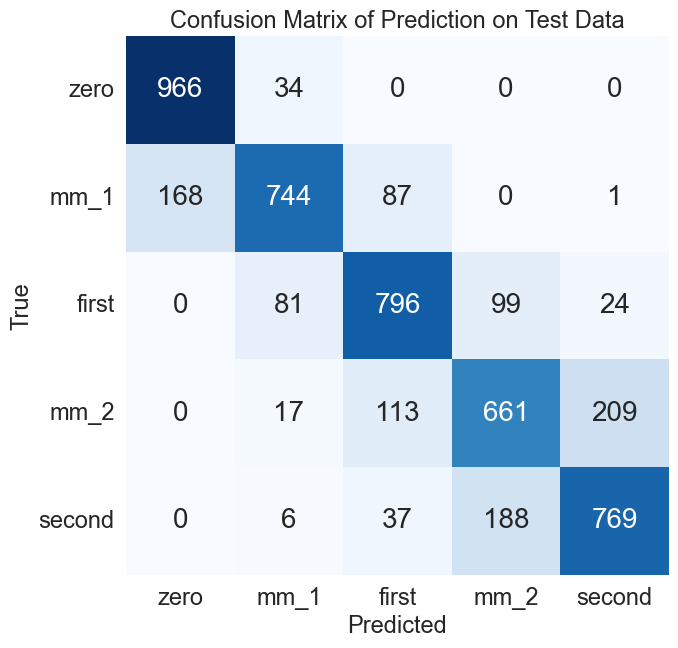

In [6]:
# show confusion matrix
plt.figure(figsize=(7, 7))
plt.rcParams.update({'font.size': 20})
cm = confusion_matrix(y_test, y_pred, labels=class_list)
sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, cbar=False)
tick_marks = np.arange(len(class_list)) + 0.5
if class_num == 6:
    class_list = ['zero', 'mm_1', 'mm_1\'', 'first', 'mm_2', 'second']
plt.xticks(tick_marks, class_list, rotation=0, fontsize=17)
plt.yticks(tick_marks, class_list, rotation=0, fontsize=17)
plt.xlabel('Predicted', fontsize=17)
plt.ylabel('True', fontsize=17)
plt.title(f'Confusion Matrix of Prediction on Test Data', fontsize=17)
plt.show()

# plt.savefig(f'./AutogluonModels/{str(class_num)}_class/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h/confusion_matrix.png', bbox_inches='tight')
# print(f'Confusion matrix saved at ./AutogluonModels/{str(class_num)}_class/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h/confusion_matrix.png')

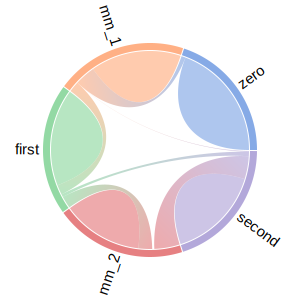

<Figure size 600x600 with 0 Axes>

In [7]:
# show chord diagram
import openchord as ocd

plt.figure(figsize=(6, 6))
fig = ocd.Chord(cm, class_list, radius=100)
fig.font_size = 15

fig.colormap = ['#79A1E3', '#FFA878', '#88D59A', '#E37275', '#AB9FD6']

fig.show()

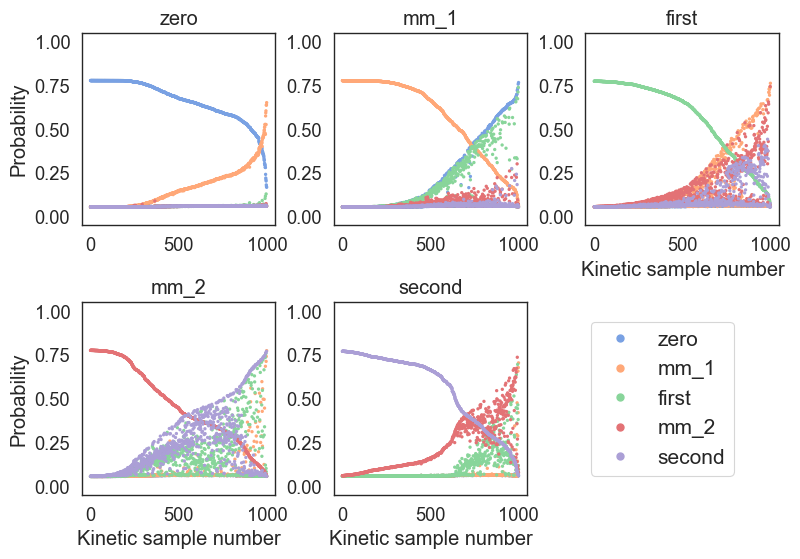

In [8]:
y_proba = y_proba[['zero', 'mm_1', 'first', 'mm_2', 'second']]
y_proba['class'] = test_merge_data['class']

def plot_scatter_figs(data, ax):
    sns.scatterplot(data=data['zero'], ax=ax, legend=False, marker='.', edgecolor='none', color='#79A1E3')
    sns.scatterplot(data=data['mm_1'], ax=ax, legend=False, marker='.', edgecolor='none', color='#FFA878')
    sns.scatterplot(data=data['first'], ax=ax, legend=False, marker='.', edgecolor='none', color='#88D59A')
    sns.scatterplot(data=data['mm_2'], ax=ax, legend=False, marker='.', edgecolor='none', color='#E37275')
    sns.scatterplot(data=data['second'], ax=ax, legend=False, marker='.', edgecolor='none', color='#AB9FD6')

# 5 figs
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
axes = axes.flatten() 
from matplotlib.lines import Line2D

# zero
df_zero = y_proba[y_proba['class'] == 'zero']
df_zero = df_zero.sort_values(by=['zero', 'mm_1', 'first', 'mm_2', 'second'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_zero, axes[0])
axes[0].set_title('zero')

# mm_1
df_mm_1 = y_proba[y_proba['class'] == 'mm_1']
df_mm_1 = df_mm_1.sort_values(by=['mm_1', 'first', 'mm_2', 'second', 'zero'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_mm_1, axes[1])
axes[1].set_title('mm_1')

# first
df_first = y_proba[y_proba['class'] == 'first']
df_first = df_first.sort_values(by=['first', 'mm_2', 'second', 'zero', 'mm_1'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_first, axes[2])
axes[2].set_title('first')

# mm_2
df_mm_2 = y_proba[y_proba['class'] == 'mm_2']
df_mm_2 = df_mm_2.sort_values(by=['mm_2', 'second', 'zero', 'mm_1', 'first'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_mm_2, axes[3])
axes[3].set_title('mm_2')

# second
df_second = y_proba[y_proba['class'] == 'second']
df_second = df_second.sort_values(by=['second', 'zero', 'mm_1', 'first', 'mm_2'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_second, axes[4])
axes[4].set_title('second')


axes[-1].axis('off')
custom_handles = [
    Line2D([0], [0], color='#79A1E3', marker='.', markersize=10, linestyle='none', label='zero'),
    Line2D([0], [0], color='#FFA878', marker='.', markersize=10, linestyle='none', label='mm_1'),
    Line2D([0], [0], color='#88D59A', marker='.', markersize=10, linestyle='none', label='first'),
    Line2D([0], [0], color='#E37275', marker='.', markersize=10, linestyle='none', label='mm_2'),
    Line2D([0], [0], color='#AB9FD6', marker='.', markersize=10, linestyle='none', label='second')
]
fig.legend(
    handles=custom_handles,
    loc='center',
    bbox_to_anchor=(0.72, 0.22, 0.1, 0.1),
    fontsize=15,
)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
# ylim
for ax in axes[:-1]:
    ax.set_ylim(-0.05, 1.05)
# no ylabel
for ax in axes[0:-1]:
    ax.set_ylabel('')
axes[0].set_ylabel('Probability')
axes[3].set_ylabel('Probability')
for ax in axes[2:-1]:
    ax.set_xlabel('Kinetic sample number')

## 2. Evaluate on test data for 6 class
- `sp_mode`: `s` (only use substrate concentration)
- `feat`: `tsfresh_raw` (use both tsfresh features and raw data)
- `ag_train_quality`: `best_quality` (use `best_quality` present in Autogluon training)
- `hours`: `3` (train for 3 hours)

In [9]:
class_list = [
    'zero',
    'mm_1',
    'mm_1_out',
    'first',
    'mm_2',
    'second',
]
class_num = len(class_list)

ag_model_root = './AutogluonModels/'
sp_mode = 's'
feat = 'tsfresh_raw'
ag_train_quality = 'best_quality'
hours = 3
label_col = 'class'
random_seed = 29

# load test data
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
if sp_mode == 's':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)
elif sp_mode == 'p':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('s')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('s')], inplace=True)
if feat == 'tsfresh':
    test_merge_data = test_tsfresh_data
elif feat == 'raw':
    test_merge_data = test_raw_data
elif feat == 'tsfresh_raw':
    test_raw_data.drop(columns=['class'], inplace=True)
    test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test = test_merge_data[label_col]
test_merge_data_nolabel = test_merge_data.drop(columns=[label_col])  # delete label column

In [10]:
# load model
model_root = os.path.join(ag_model_root, f'{str(class_num)}_class', f'{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h')
predictor = TabularPredictor.load(model_root)
predictor.leaderboard()

model  score_val eval_metric  pred_time_val  \
0           WeightedEnsemble_L3   0.759056    accuracy      70.848392   
1                XGBoost_BAG_L2   0.758815    accuracy      68.307551   
2               LightGBM_BAG_L2   0.758667    accuracy      67.859621   
3             LightGBMXT_BAG_L2   0.757907    accuracy      67.975304   
4          LightGBM_r131_BAG_L2   0.757852    accuracy      68.448458   
5          LightGBMLarge_BAG_L2   0.757222    accuracy      68.117488   
6           LightGBM_r96_BAG_L2   0.756556    accuracy      68.523415   
7       RandomForestEntr_BAG_L2   0.756185    accuracy      72.920364   
8         ExtraTreesGini_BAG_L2   0.755907    accuracy      73.162529   
9       RandomForestGini_BAG_L2   0.755019    accuracy      73.026108   
10        ExtraTreesEntr_BAG_L2   0.754389    accuracy      73.116077   
11       NeuralNetFastAI_BAG_L2   0.754204    accuracy      67.982341   
12           CatBoost_r9_BAG_L2   0.753648    accuracy      67.535004   
13         CatBoost_r177_BAG_L2   0.753167    accuracy      67.496537   
14              CatBoost_BAG_L2   0.753093    accuracy      67.525440   
15          WeightedEnsemble_L2   0.753019    accuracy      20.874778   
16  NeuralNetFastAI_r191_BAG_L2   0.753000    accuracy      68.388759   
17        NeuralNetTorch_BAG_L2   0.751611    accuracy      69.517532   
18    NeuralNetTorch_r79_BAG_L2   0.750833    accuracy      69.536118   
19         LightGBMLarge_BAG_L1   0.749519    accuracy       4.942595   
20            LightGBMXT_BAG_L1   0.746241    accuracy       6.592559   
21              LightGBM_BAG_L1   0.745889    accuracy       4.324581   
22               XGBoost_BAG_L1   0.744741    accuracy       2.671819   
23           XGBoost_r33_BAG_L2   0.744093    accuracy      68.201584   
24      RandomForestEntr_BAG_L1   0.740056    accuracy       4.854530   
25      RandomForestGini_BAG_L1   0.739093    accuracy       4.927083   
26              CatBoost_BAG_L1   0.738037    accuracy       0.202233   
27         CatBoost_r177_BAG_L1   0.735370    accuracy       0.183533   
28        NeuralNetTorch_BAG_L1   0.733315    accuracy       1.484510   
29        ExtraTreesEntr_BAG_L1   0.728852    accuracy       5.151709   
30        ExtraTreesGini_BAG_L1   0.727796    accuracy       5.090034   
31         LightGBM_r131_BAG_L1   0.725463    accuracy       0.338153   
32    NeuralNetTorch_r79_BAG_L1   0.724981    accuracy       1.483934   
33       NeuralNetFastAI_BAG_L1   0.717556    accuracy       0.571837   
34        KNeighborsDist_BAG_L1   0.571019    accuracy      12.389944   
35        KNeighborsUnif_BAG_L1   0.567593    accuracy      12.140024   

       fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0   5681.000792                0.003459           2.237548            3   
1   5466.734611                0.958472         153.301219            2   
2   5429.446137                0.510541         116.012745            2   
3   5396.536537                0.626225          83.103145            2   
4   5490.330850                1.099379         176.897458            2   
5   5597.068315                0.768409         283.634923            2   
6   5383.963619                1.174336          70.530227            2   
7   5338.283365                5.571285          24.849973            2   
8   5319.077784                5.813450           5.644392            2   
9   5335.046975                5.677028          21.613583            2   
10  5318.814991                5.766998           5.381600            2   
11  5440.361301                0.633262         126.927909            2   
12  5709.882540                0.185925         396.449148            2   
13  5511.650198                0.147458         198.216806            2   
14  5546.963546                0.176361         233.530154            2   
15  1349.236027                0.003326           1.455603            2   
16  5621.052439                1.039680         3

In [11]:
# predict on test data
y_pred = predictor.predict(test_merge_data_nolabel)
y_proba = predictor.predict_proba(test_merge_data_nolabel)

In [12]:
# show performance
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_proba, multi_class="ovr"):.4f}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred):.4f}')
print(f'F1: {f1_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Top-2 accuracy: {top_k_accuracy_score(y_test, y_proba, k=2):.4f}')
print(f'Top-3 accuracy: {top_k_accuracy_score(y_test, y_proba, k=3):.4f}')
print('================================')
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.7668
ROC_AUC: 0.9646
MCC: 0.7209
F1: 0.7656
Precision: 0.7686
Recall: 0.7668
Top-2 accuracy: 0.9415
Top-3 accuracy: 0.9883
Classification report:
              precision    recall  f1-score   support

       first       0.72      0.78      0.75      1000
        mm_1       0.72      0.71      0.72      1000
    mm_1_out       0.86      0.70      0.77      1000
        mm_2       0.68      0.68      0.68      1000
      second       0.77      0.78      0.78      1000
        zero       0.85      0.96      0.90      1000

    accuracy                           0.77      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.77      0.77      0.77      6000



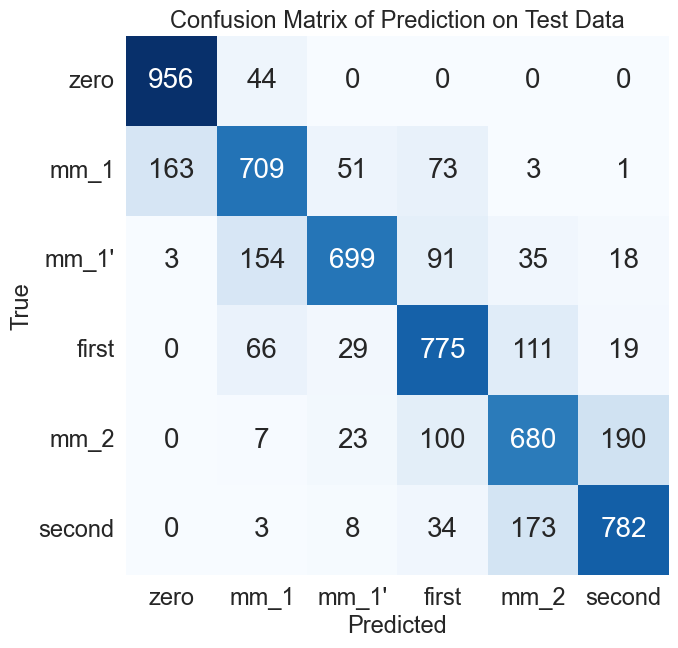

In [13]:
# show confusion matrix
plt.figure(figsize=(7, 7))
plt.rcParams.update({'font.size': 20})
cm = confusion_matrix(y_test, y_pred, labels=class_list)
sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, cbar=False)
tick_marks = np.arange(len(class_list)) + 0.5
if class_num == 6:
    class_list = ['zero', 'mm_1', 'mm_1\'', 'first', 'mm_2', 'second']
plt.xticks(tick_marks, class_list, rotation=0, fontsize=17)
plt.yticks(tick_marks, class_list, rotation=0, fontsize=17)
plt.xlabel('Predicted', fontsize=17)
plt.ylabel('True', fontsize=17)
plt.title(f'Confusion Matrix of Prediction on Test Data', fontsize=17)
plt.show()

# plt.savefig(f'./AutogluonModels/{str(class_num)}_class/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h/confusion_matrix.png', bbox_inches='tight')
# print(f'Confusion matrix saved at ./AutogluonModels/{str(class_num)}_class/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h/confusion_matrix.png')

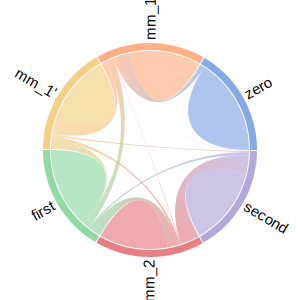

<Figure size 600x600 with 0 Axes>

In [14]:
# show chord diagram
import openchord as ocd

plt.figure(figsize=(6, 6))
fig = ocd.Chord(cm, class_list, radius=100)
fig.font_size = 15

fig.colormap = ['#79A1E3', '#FFA878', '#F3CA79', '#88D59A', '#E37275', '#AB9FD6']

fig.show()

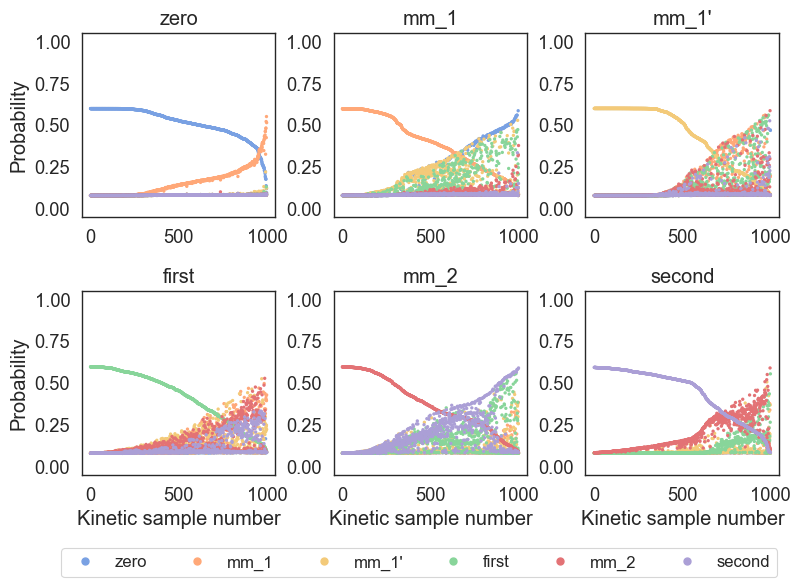

In [17]:
y_proba = y_proba[['zero', 'mm_1', 'mm_1_out', 'first', 'mm_2', 'second']]
y_proba['class'] = test_merge_data['class']

def plot_scatter_figs(data, ax):
    sns.scatterplot(data=data['zero'], ax=ax, legend=False, marker='.', edgecolor='none', color='#79A1E3')
    sns.scatterplot(data=data['mm_1'], ax=ax, legend=False, marker='.', edgecolor='none', color='#FFA878')
    sns.scatterplot(data=data['mm_1_out'], ax=ax, legend=False, marker='.', edgecolor='none', color='#F3CA79')
    sns.scatterplot(data=data['first'], ax=ax, legend=False, marker='.', edgecolor='none', color='#88D59A')
    sns.scatterplot(data=data['mm_2'], ax=ax, legend=False, marker='.', edgecolor='none', color='#E37275')
    sns.scatterplot(data=data['second'], ax=ax, legend=False, marker='.', edgecolor='none', color='#AB9FD6')

# 6 figs
fig, axes = plt.subplots(2, 3, figsize=(9, 6.5))
axes = axes.flatten()
from matplotlib.lines import Line2D

# zero
df_zero = y_proba[y_proba['class'] == 'zero']
df_zero = df_zero.sort_values(by=['zero', 'mm_1', 'mm_1_out', 'first', 'mm_2', 'second', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_zero, axes[0])
axes[0].set_title('zero')

# mm_1
df_mm_1 = y_proba[y_proba['class'] == 'mm_1']
df_mm_1 = df_mm_1.sort_values(by=['mm_1', 'mm_1_out', 'first', 'mm_2', 'second', 'zero', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_mm_1, axes[1])
axes[1].set_title('mm_1')

# mm_1_out
df_mm_1_out = y_proba[y_proba['class'] == 'mm_1_out']
df_mm_1_out = df_mm_1_out.sort_values(by=['mm_1_out', 'first', 'mm_2', 'second', 'zero', 'mm_1', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_mm_1_out, axes[2])
axes[2].set_title('mm_1\'')

# first
df_first = y_proba[y_proba['class'] == 'first']
df_first = df_first.sort_values(by=['first', 'mm_2', 'second', 'zero', 'mm_1', 'mm_1_out', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_first, axes[3])
axes[3].set_title('first')

# mm_2
df_mm_2 = y_proba[y_proba['class'] == 'mm_2']
df_mm_2 = df_mm_2.sort_values(by=['mm_2', 'second', 'zero', 'mm_1', 'mm_1_out', 'first', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_mm_2, axes[4])
axes[4].set_title('mm_2')

# second
df_second = y_proba[y_proba['class'] == 'second']
df_second = df_second.sort_values(by=['second', 'zero', 'mm_1', 'mm_1_out', 'first', 'mm_2', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_second, axes[5])
axes[5].set_title('second')


custom_handles = [
    Line2D([0], [0], color='#79A1E3', marker='.', markersize=10, linestyle='none', label='zero'),
    Line2D([0], [0], color='#FFA878', marker='.', markersize=10, linestyle='none', label='mm_1'),
    Line2D([0], [0], color='#F3CA79', marker='.', markersize=10, linestyle='none', label='mm_1\''),
    Line2D([0], [0], color='#88D59A', marker='.', markersize=10, linestyle='none', label='first'),
    Line2D([0], [0], color='#E37275', marker='.', markersize=10, linestyle='none', label='mm_2'),
    Line2D([0], [0], color='#AB9FD6', marker='.', markersize=10, linestyle='none', label='second')
]
fig.legend(
    handles=custom_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.1),
    ncols=6,
    fontsize=12,
)

plt.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.2)
# ylim
for ax in axes:
    ax.set_ylim(-0.05, 1.05)
# no ylabel
for ax in axes:
    ax.set_ylabel('')
axes[0].set_ylabel('Probability')
axes[3].set_ylabel('Probability')
for ax in axes[3:]:
    ax.set_xlabel('Kinetic sample number')